In [1]:
import pandas as pd

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
fig_size = (12, 4)
start_date = '1970-01-02'
today = datetime.today().strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')
five_years = (datetime.today()-relativedelta(years=5)).strftime('%Y-%m-%d')
ten_years = (datetime.today()-relativedelta(years=10)).strftime('%Y-%m-%d')

In [3]:
def get_dma_analysis(ticker, start_date=start_date, end_date=datetime.today().strftime('%Y-%m-%d'), ma_period=200):
    df = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()
    df['DMA'] = df['Close'].rolling(ma_period).mean()
    df['PCH_DMA'] = 100*(df['Close']-df['DMA'])/df['DMA']
    df['PCH_DMA_MEAN'] = df['PCH_DMA'].mean()
    df['PCH_DMA_MEDIAN'] = df['PCH_DMA'].median()
    df = df.round(3)
    print('Start', df[['Date', 'Close']].set_index('Date').head(1).transpose())
    print('\nEnd', df[['Date', 'Close', 'DMA', 'PCH_DMA', 'PCH_DMA_MEAN', 'PCH_DMA_MEDIAN']].set_index('Date').tail(1).transpose())
    return df
        
def plot_dma_analysis(df, start_date=start_date, end_date=datetime.today().strftime('%Y-%m-%d'), title=''):
    df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].plot(
        x='Date', y=['Close', 'DMA'], style = ['-', '--'],
        figsize=fig_size, grid=True, title=title)
    df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].plot(
        x='Date', y=['PCH_DMA', 'PCH_DMA_MEAN', 'PCH_DMA_MEDIAN'], style=['-', '--', '--'],
        figsize=fig_size, grid=True, title=title)
    
def plot_dma_hist(df, bins=100, title=''):
    df.plot(
        x='Date', y=['PCH_DMA'], kind='hist', bins=bins,
        figsize=fig_size, grid=True, title=title)
    
def get_dma_percentile(df, bins=100):
    current_pch_dma_rank_percentile = round(100*df['PCH_DMA'].dropna().rank(axis=0).tail(1).values[0]/len(df['PCH_DMA'].dropna()), 2)
    print('Current PCH DMA percentile:', current_pch_dma_rank_percentile)
    return(current_pch_dma_rank_percentile)

Start Date   1970-01-02
Close        93.0

End Date            2020-11-16
Close             3626.910
DMA               3141.551
PCH_DMA             15.450
PCH_DMA_MEAN         3.105
PCH_DMA_MEDIAN       4.023
Current PCH DMA percentile: 96.02


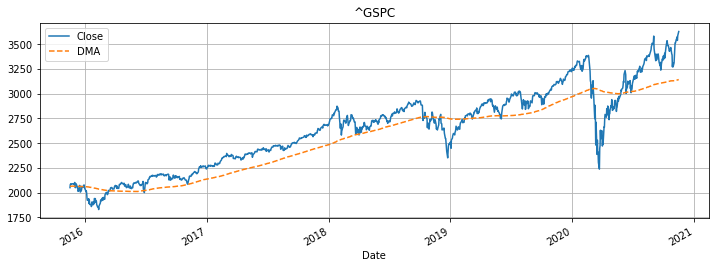

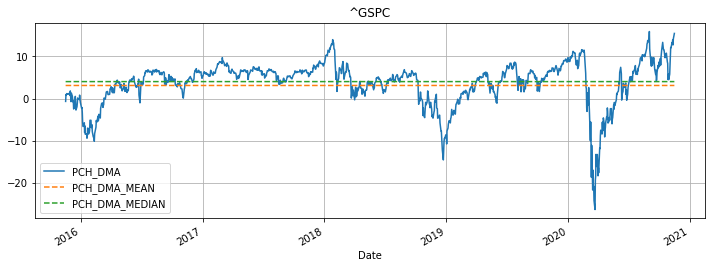

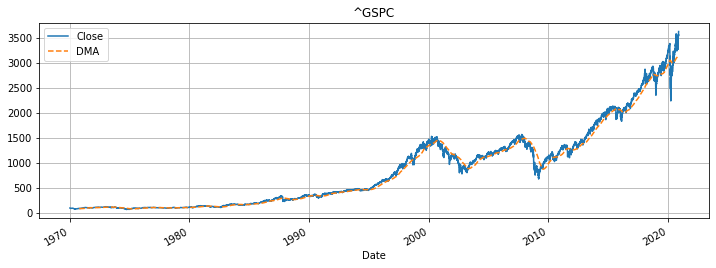

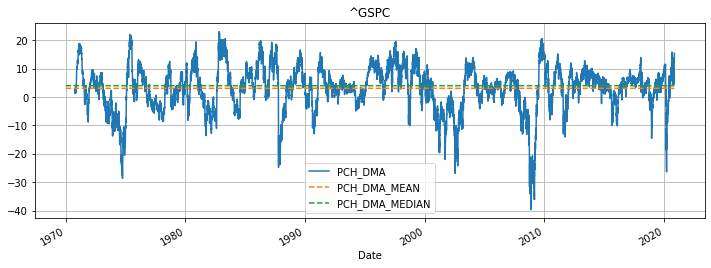

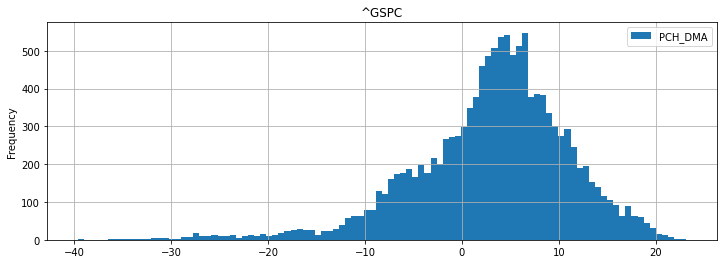

In [4]:
ticker = '^GSPC'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=five_years, title=ticker)
plot_dma_analysis(df, start_date=start_date, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)

Start Date   2009-11-23
Close       75.26

End Date            2020-11-16
Close               82.900
DMA                 81.802
PCH_DMA              1.343
PCH_DMA_MEAN         0.274
PCH_DMA_MEDIAN       0.270
Current PCH DMA percentile: 85.15


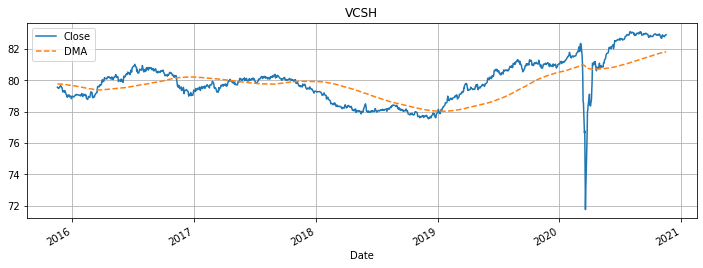

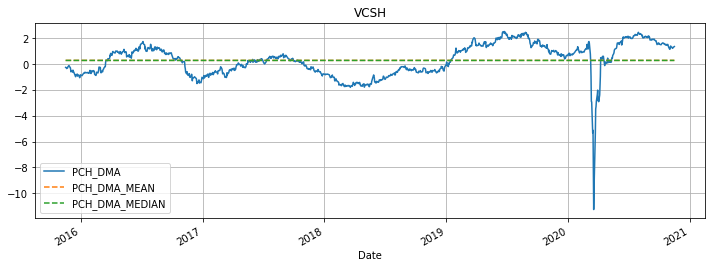

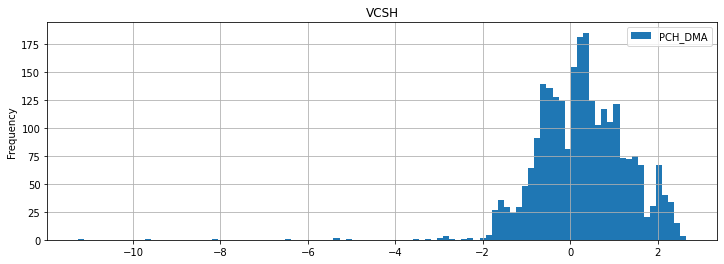

In [5]:
ticker = 'VCSH'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=five_years, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)

Start Date   2007-09-17
Close     4494.65

End Date            2020-11-17
Close            12846.500
DMA              10713.321
PCH_DMA             19.911
PCH_DMA_MEAN         2.946
PCH_DMA_MEDIAN       4.074
Current PCH DMA percentile: 95.03


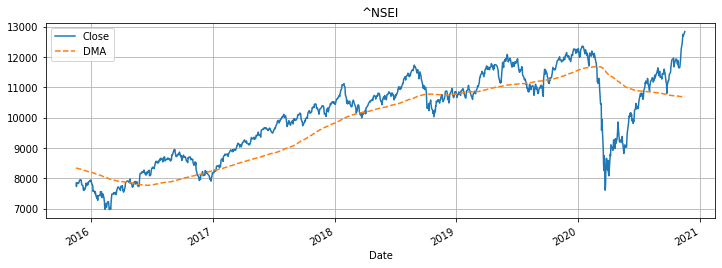

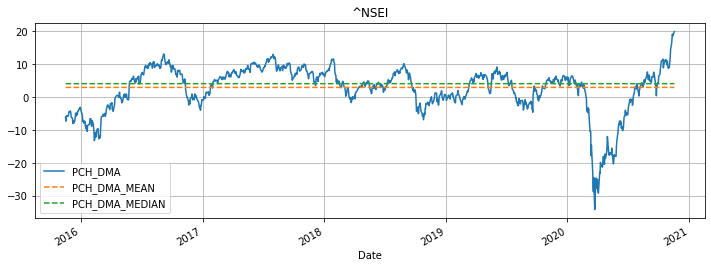

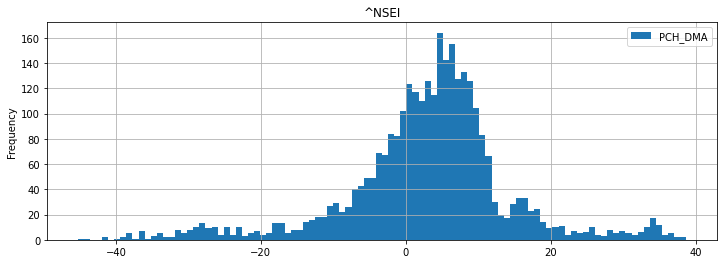

In [6]:
ticker = '^NSEI'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=five_years, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)

Start Date   2003-12-01
Close       45.71

End Date            2020-11-17
Close               74.548
DMA                 74.727
PCH_DMA             -0.240
PCH_DMA_MEAN         1.225
PCH_DMA_MEDIAN       0.635
Current PCH DMA percentile: 39.63


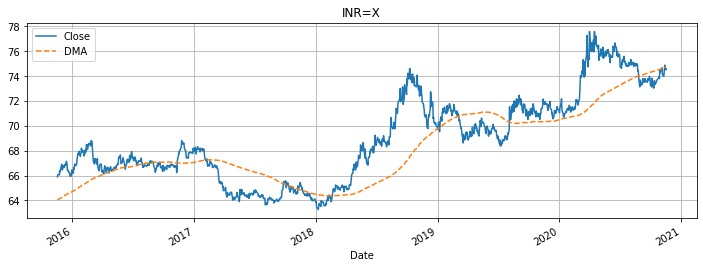

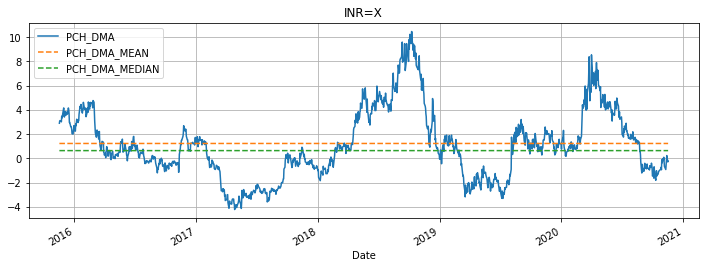

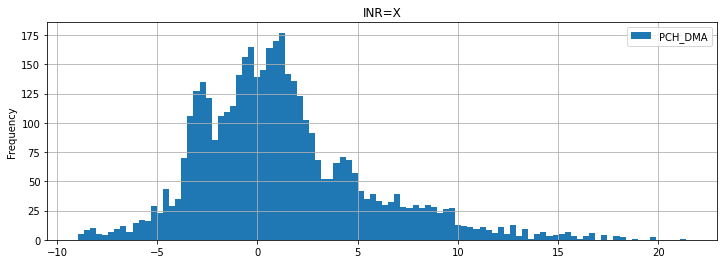

In [7]:
ticker = 'INR=X'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=five_years, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)

Start Date   1970-01-02
Close       1.938

End Date            2020-11-16
Close               38.160
DMA                 42.537
PCH_DMA            -10.291
PCH_DMA_MEAN         2.625
PCH_DMA_MEDIAN       2.806
Current PCH DMA percentile: 6.09


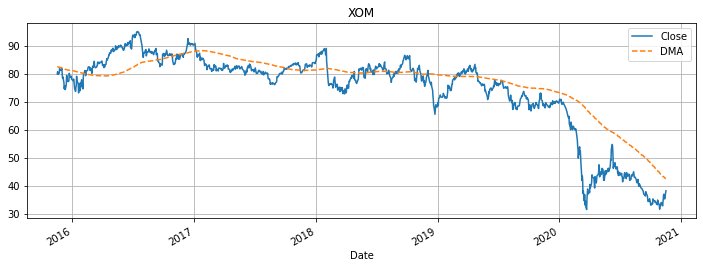

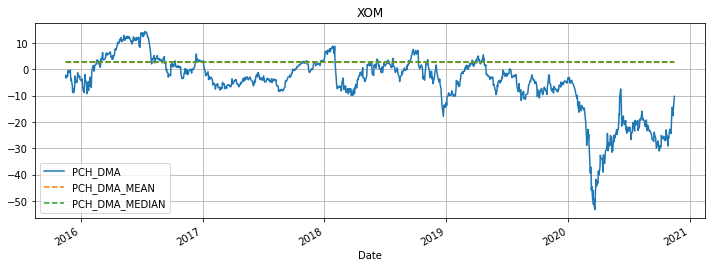

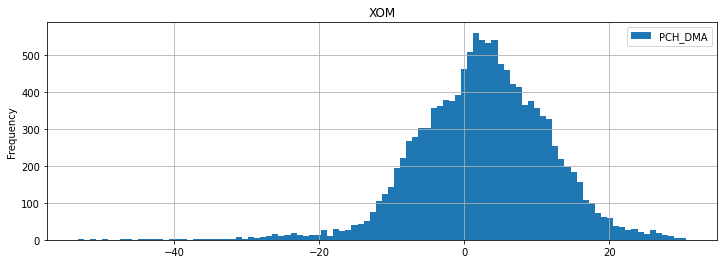

In [8]:
ticker = 'XOM'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=five_years, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)

Start Date   1970-01-02
Close       0.979

End Date            2020-11-16
Close              202.400
DMA                179.355
PCH_DMA             12.849
PCH_DMA_MEAN         5.305
PCH_DMA_MEDIAN       5.180
Current PCH DMA percentile: 69.47


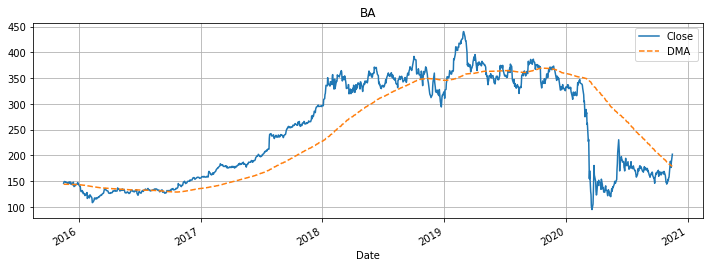

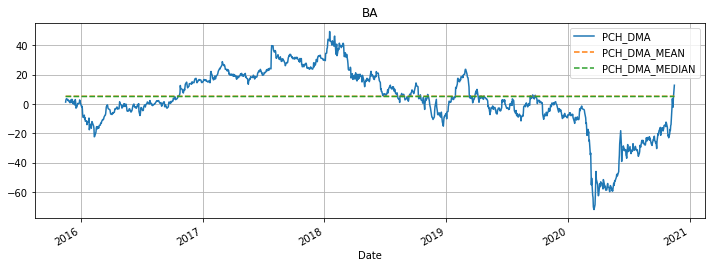

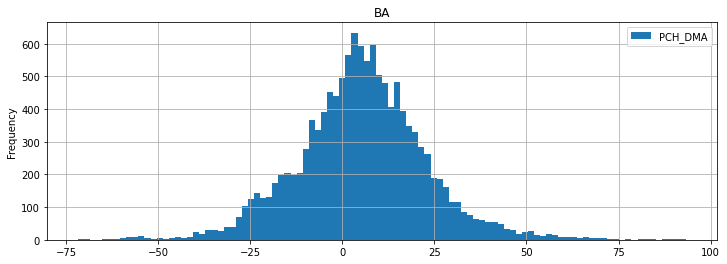

In [9]:
ticker = 'BA'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=five_years, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)